In [5]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

import preprocess_data

In [6]:
df = pd.read_csv('data.csv') 

In [7]:
# Print first 2 rows
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [8]:
X = preprocess_data.get_data()
y = df['Survived']

In [9]:
X.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False


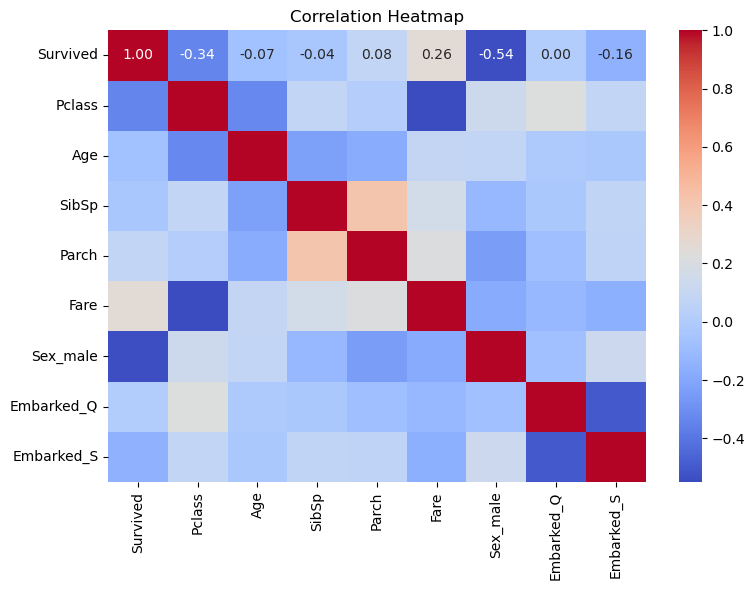

In [10]:
# Create subplots
fig, axes = plt.subplots(figsize=(8, 6))

# Correlation heatmap
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=axes)
axes.set_title('Correlation Heatmap')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
lr = LogisticRegression(random_state=0, max_iter=1000)

In [13]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [14]:
# Prediction
y_pred = lr.predict(X_test)

In [15]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_pred, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print a classification report for more detailed metrics
report = classification_report(y_pred, y_pred)
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[157   0]
 [  0 111]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       111

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



In [16]:
# Accuracy percentage

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 100.0
